In [1]:
# HELLO WORLD

In [2]:
from cProfile import label
from sys import set_int_max_str_digits
from tokenize import group

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [6]:
house_data = fetch_openml(name='house_prices', version=1, as_frame=True)

In [9]:
house_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
df = house_data.data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
print(house_data.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [11]:
# Extract useful features

# 1. LotFrontage (numerical)
# 2. LotArea (numerical)
# MasVnrArea (numerical)
# Street (categorical - nominal)
# LotShape (categorical - ordinal)

dataframe = df[['LotFrontage', 'LotArea', 'MasVnrArea', 'Street', 'LotShape']].copy()

# Introduce some missing values

dataframe.loc[5:10, 'LotFrontage'] = np.nan
dataframe.loc[7:14, 'MasVnrArea'] = np.nan

# Define preprocessing pipelines

# Create pipelines for as many feature types exist in the dataset -> So get a dataset with all the features (categorical-nominal, categorical-ordinal and numerical)

# pass in the name and class of the transformer into the pipeline
# This is a pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

nominal_pipeline = OneHotEncoder(handle_unknown='ignore')

# This is a pipeline for ordinal features
ordinal_pipeline = OrdinalEncoder(categories=[['IR3', 'IR2', 'IR1', 'Reg']])

# Create a column transformer to apply the pipelines to the appropriate columns
# (name, pipeline_variable, columns_to_transform)
preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['LotFrontage', 'LotArea', 'MasVnrArea']),
    ('onehot', nominal_pipeline, ['Street']),
    ('ordinal', ordinal_pipeline, ['LotShape'])
])

In [12]:
df_transformed = preprocessor.fit_transform(dataframe)

In [14]:
df_transformed

array([[-0.22146739, -0.20714171,  0.5184068 ,  0.        ,  1.        ,
         3.        ],
       [ 0.46021017, -0.09188637, -0.56716973,  0.        ,  1.        ,
         3.        ],
       [-0.08513188,  0.07347998,  0.3300925 ,  0.        ,  1.        ,
         2.        ],
       ...,
       [-0.17602222, -0.14781027, -0.56716973,  0.        ,  1.        ,
         3.        ],
       [-0.08513188, -0.08016039, -0.56716973,  0.        ,  1.        ,
         3.        ],
       [ 0.23298432, -0.05811155, -0.56716973,  0.        ,  1.        ,
         3.        ]])

In [15]:
print(df_transformed)

# It's an arraayy of 2D arrays, not yet a dataframe

[[-0.22146739 -0.20714171  0.5184068   0.          1.          3.        ]
 [ 0.46021017 -0.09188637 -0.56716973  0.          1.          3.        ]
 [-0.08513188  0.07347998  0.3300925   0.          1.          2.        ]
 ...
 [-0.17602222 -0.14781027 -0.56716973  0.          1.          3.        ]
 [-0.08513188 -0.08016039 -0.56716973  0.          1.          3.        ]
 [ 0.23298432 -0.05811155 -0.56716973  0.          1.          3.        ]]


In [16]:
column_name = (
    ['LotFrontage_scaled', 'LotArea_scaled', 'MasVnrArea_scaled'] +
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(['Street'])) +
    ['LotShape_encoded']
)

df_transformed = pd.DataFrame(df_transformed, columns=column_name)

In [17]:
df_transformed.head()

,LotFrontage_scaled,LotArea_scaled,MasVnrArea_scaled,Street_Grvl,Street_Pave,LotShape_encoded
0,-0.221467,-0.207142,0.518407,0.0,1.0,3.0
1,0.460210,-0.091886,-0.567170,0.0,1.0,3.0
2,-0.085132,0.073480,0.330093,0.0,1.0,2.0
3,-0.448693,-0.096897,-0.567170,0.0,1.0,2.0
4,0.641991,0.375148,1.371360,0.0,1.0,2.0


In [19]:
# EDA

titanic_df = pd.read_csv('../data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


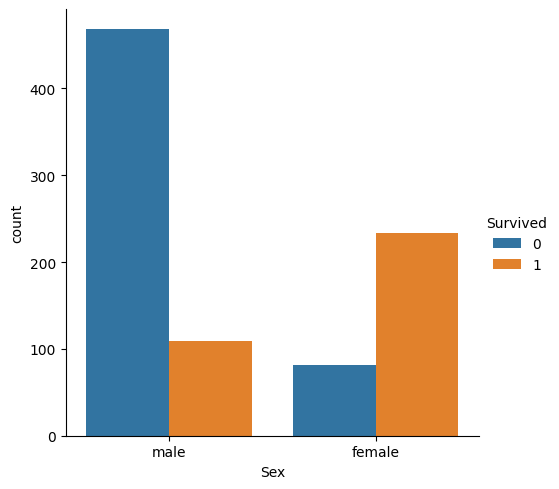

In [20]:
import seaborn as sns

# Count plot - How the sex of the passengers correlates to the survival rate

sns.catplot(x='Sex', hue='Survived', data=titanic_df, kind='count')

<Axes: xlabel='Survived', ylabel='Pclass'>

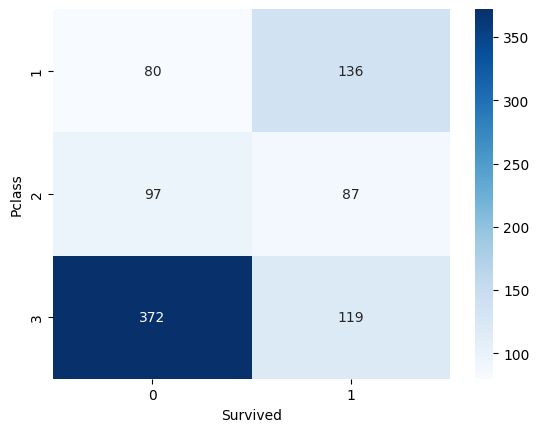

In [25]:
# Group the passenger classes with survival rate - via a heatmap

p_group = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

sns.heatmap(p_group, annot=True, fmt='d', cmap='Blues')

<Axes: xlabel='Sex', ylabel='Age'>

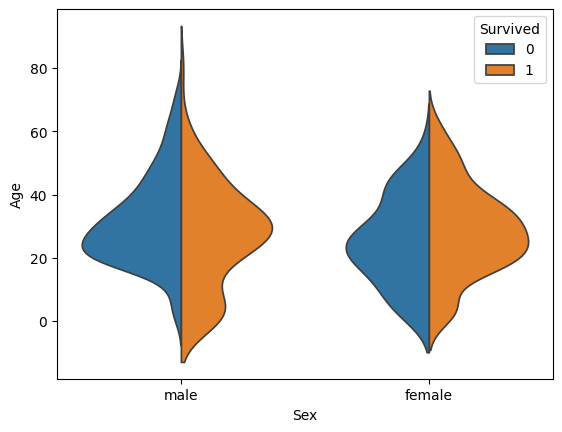

In [26]:
# Violin plot - How the sex is distributed against the age of the passengers

sns.violinplot(x='Sex', y='Age', data=titanic_df, hue='Survived', split=True, inner=None)

C:\Users\sammi\AppData\Local\Temp\ipykernel_24748\4291158004.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'], shade=True, label='Survived', color='green')
C:\Users\sammi\AppData\Local\Temp\ipykernel_24748\4291158004.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'], shade=True, label='Not Survived', color='red')


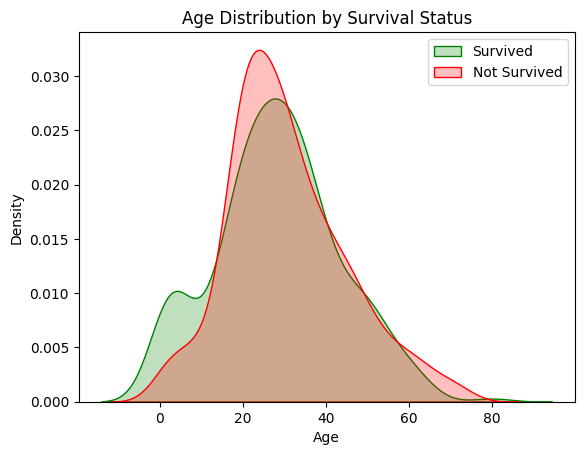

In [27]:
# Plot age distribution by survival status

sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'], shade=True, label='Survived', color='green')
sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'], shade=True, label='Not Survived', color='red')
plt.title('Age Distribution by Survival Status')
plt.legend()

plt.show()

C:\Users\sammi\AppData\Local\Temp\ipykernel_24748\2485891284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamiltySize', y='Survived', data=titanic_df, palette='viridis')


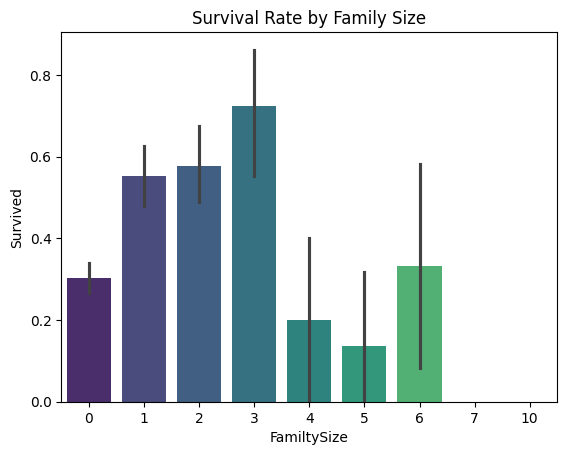

In [30]:
# titanic_df['FamiltySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['FamiltySize'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.barplot(x='FamiltySize', y='Survived', data=titanic_df, palette='viridis')
plt.title('Survival Rate by Family Size')

plt.show()

C:\Users\sammi\AppData\Local\Temp\ipykernel_24748\46172070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fare_Range', y='Survived', data=titanic_df, palette='Spectral')


<Axes: xlabel='Fare_Range', ylabel='Survived'>

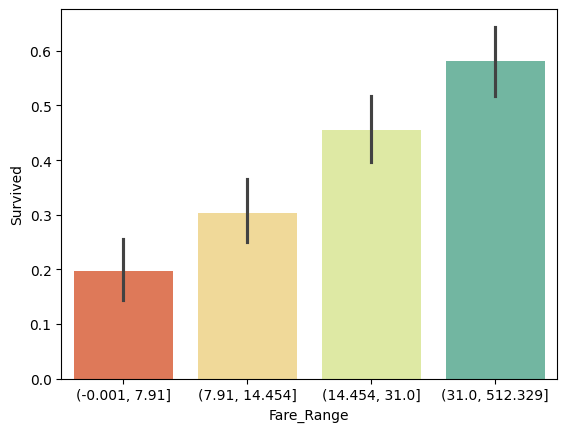

In [32]:
titanic_df['Fare_Range'] = pd.qcut(titanic_df['Fare'], 4)

sns.barplot(x='Fare_Range', y='Survived', data=titanic_df, palette='Spectral')

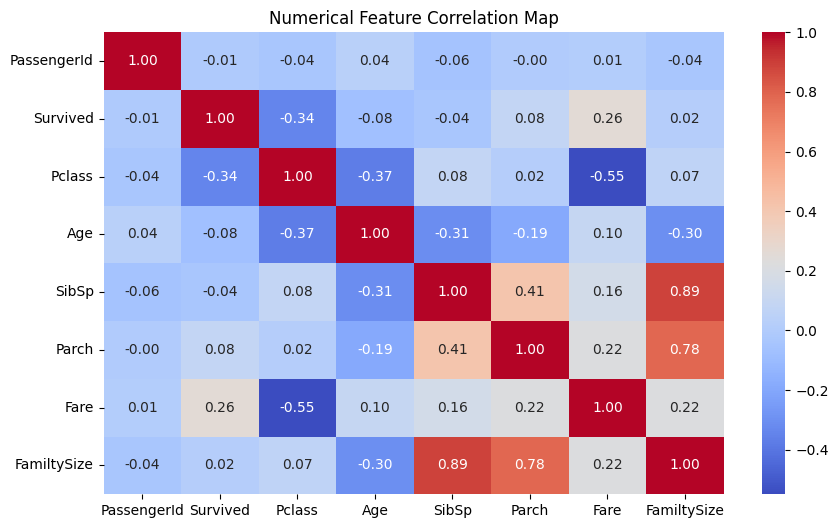

In [33]:
# We don't want correlated features, why?
# In general, when you are adding correlated features, it means that they linearly contains the same information and thus it will reduce the robustness of your model

# How do we check for correlated features? - HEATMAP

titanic_corr = titanic_df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numerical Feature Correlation Map')

plt.show()

In [34]:
# From both correlations between 'Pclass' and 'Fare' and 'Pclass' and 'Survived', we can see that they are correlated
# So we can drop one of them or merge them

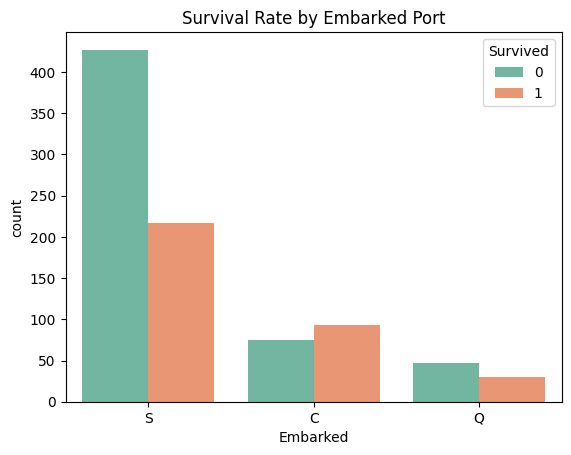

In [35]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_df, palette='Set2')
plt.title('Survival Rate by Embarked Port')
plt.show()

In [ ]:
# Principle component analysis (PCA) - dimensionality reduction technique